In [110]:
import pandas
from matplotlib import pyplot as plt
import numpy as np
import utils

disease='MCTD'
disease_fullname = 'Mixed Connective Tissue Disease'
symp_types=['formal', 'informal']
model_names = ['chatgpt-3.5', 'chatgpt-4o', 'claude-3-opus', 'claude-3.5-sonnet' ]
keywords_list = ['mctd', 'mixed connective tissue disease']

In [114]:

disease='SLE'
disease_fullname = 'Systemic Lupus Erythematosus' 
symp_types=['formal', 'informal']
model_names = ['chatgpt-3.5', 'chatgpt-4o', 'claude-3-opus', 'claude-3.5-sonnet' ]
keywords_list = ['sle','lupus','systemic lupus erythematosus']

In [118]:

disease='JDM'
disease_fullname = 'Juvenile Dermatomyositis'
symp_types=['formal', 'informal']
model_names = ['chatgpt-3.5', 'chatgpt-4o', 'claude-3-opus', 'claude-3.5-sonnet' ]
keywords_list=['jdm', 'dermatomyositis']


In [122]:

disease='SystemicSclerosis'
disease_fullname = 'Systemic Sclerosis'
symp_types=['formal', 'informal']
model_names = ['chatgpt-3.5', 'chatgpt-4o', 'claude-3-opus', 'claude-3.5-sonnet' ]
keywords_list =  ['sclerosis','scleroderma']

In [123]:
top = {}
top_three = {}
top_five = {}

for s in symp_types:
    for m in model_names:
        fname = f'{disease}-{s}-{m}.txt'
        all_patients = utils.process_file(fname)
        top_symptom = sum([(1 if utils.approx_matches(keywords_list, p.get_top_three_symptoms(1)) else 0) for p in all_patients])
        top_three_symptom = sum([(1 if utils.approx_matches(keywords_list, p.get_top_three_symptoms(3)) else 0) for p in all_patients])
        top_five_symptom = sum([(1 if utils.approx_matches(keywords_list, p.get_top_three_symptoms(5)) else 0) for p in all_patients])
        n = len(all_patients)
        top[(s, m)] = top_symptom/n
        top_three[(s,m)] = top_three_symptom/n
        top_five[(s,m)] = top_five_symptom/n

Patient: number 1, gender female, age 10, weight 54, height 46
Symptom: Skin tightening 
Symptom: Rayanud phenomenon
Symptom: Soft tissue contracture
Symptom: Artharlgia
Symptom: Muscle weakness and pain
Symptom: Dyspnea 
response: 1,*Juvenile Systemic Sclerosis*,70%,*The patient presents with skin tightening, Raynaud phenomenon, soft tissue contracture, and dyspnea, which are all characteristic symptoms of juvenile systemic sclerosis.*
response: 2,*Juvenile Dermatomyositis*,15%,*Muscle weakness and pain along with arthralgia are common symptoms of juvenile dermatomyositis in children.*
response: 3,*Mixed Connective Tissue Disease*,10%,*The combination of skin tightening, Raynaud phenomenon, soft tissue contracture, and dyspnea could also be seen in mixed connective tissue disease.*
response: 4,*Juvenile Idiopathic Arthritis*,3%,*Arthralgia and muscle weakness are common symptoms in juvenile idiopathic arthritis, but the presence of skin tightening and other symptoms make this less lik

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [124]:
bar_order = [(s,t) for s in symp_types for t in model_names]
print(bar_order)

[('formal', 'chatgpt-3.5'), ('formal', 'chatgpt-4o'), ('formal', 'claude-3-opus'), ('formal', 'claude-3.5-sonnet'), ('informal', 'chatgpt-3.5'), ('informal', 'chatgpt-4o'), ('informal', 'claude-3-opus'), ('informal', 'claude-3.5-sonnet')]


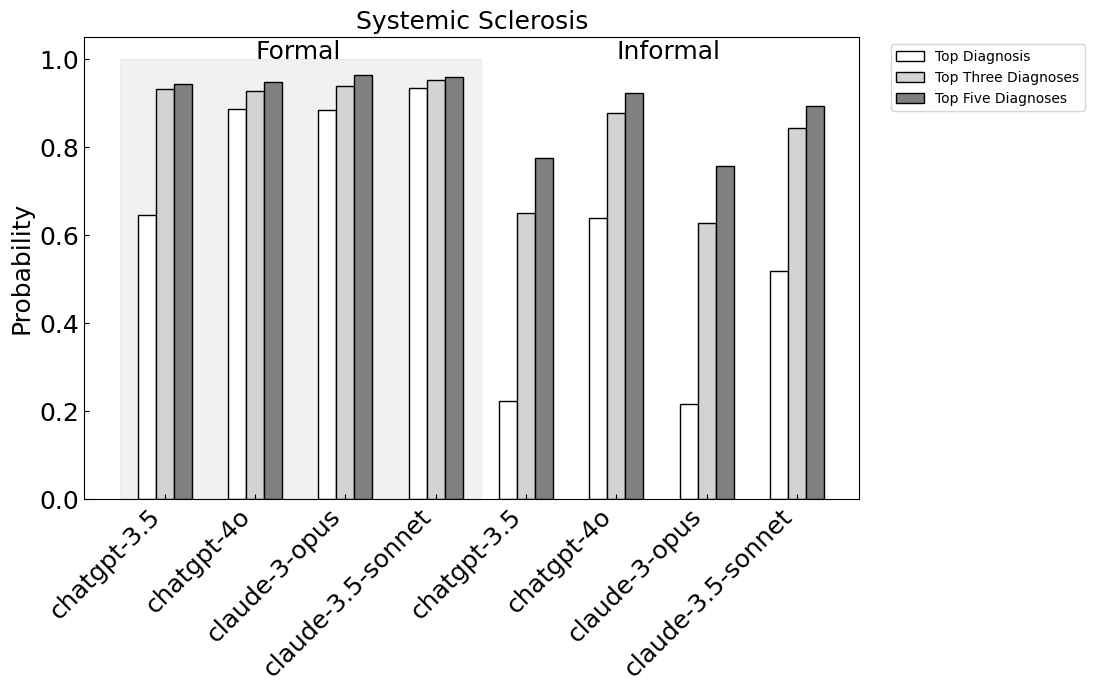

In [125]:
from matplotlib.patches import Rectangle
x = [f'{m}' for (s,m) in bar_order]
top_accuracies = [top[tup] for tup in bar_order]
top_three_accuracies = [top_three[tup] for tup in bar_order]
top_five_accuracies = [top_five[tup] for tup in bar_order]
X_axis = np.arange(len(top_accuracies)) 
  

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
#ax.axvspan(-0.5, 3.5, color='lightblue', alpha=0.3)

 
rect = Rectangle(
    (-0.5, 0),  # Start position (x, y) for the shaded region
    4,  # Width to cover the first half of the bars
    1.0,  # Height to cover the bars fully
    color='lightgray',  # Background color
    alpha=0.3,  # Transparency
    hatch='',  # Hatching pattern
    zorder=0  # Place behind the bars
)
ax.add_patch(rect)

bar1 = ax.bar(X_axis - 0.2, top_accuracies, 0.2, label = f'Top Diagnosis', edgecolor='black', color='white') 
bar2 = ax.bar(X_axis, top_three_accuracies, 0.2, label = f'Top Three Diagnoses', edgecolor='black', color='lightgray')
bar3 = ax.bar(X_axis+0.2, top_five_accuracies, 0.2, label = f'Top Five Diagnoses', edgecolor='black', color='gray')

# Color the first half differently
for i, bar in enumerate(bar1):
    if i <= 3:
        #bar.set_color('lightblue')
        bar.set_edgecolor('black')
    #bar.set_hatch('\\')
    
# Color the first half differently
for i, bar in enumerate(bar2):
    if i <= 3:
        #bar.set_color('lightblue')
        bar.set_edgecolor('black')
    #bar.set_hatch('//')

# Color the first half differently
for i, bar in enumerate(bar3):
    if i <= 3:
        #bar.set_color('lightblue')
        bar.set_edgecolor('black')
    #bar.set_hatch('-')



plt.xticks(X_axis, x, rotation=45, ha='right')  
plt.ylabel("Probability",fontsize=18) 
plt.title(f"{disease_fullname}",fontsize=18) 
plt.legend(bbox_to_anchor=(1.3, 1))
plt.tick_params(direction='in')
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)  # Set font size for y-axis ticks

ax.text(1,1.0,'Formal',fontsize=18)
ax.text(5,1.0,'Informal', fontsize=18)
plt.savefig(f'{disease}-diagnosis-accuracies.jpg', bbox_inches='tight', dpi=300)
plt.show() 